In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [14]:
import seaborn as sns

In [29]:
from scipy.stats import skew

# The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

In [9]:
#Reading Data
train = pd.read_csv('train_yaOffsB.csv')
test = pd.read_csv('test_pFkWwen.csv')

In [3]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
train.shape

(88858, 10)

In [6]:
test.shape

(59310, 9)

# Data Description
Variable    Definition
ID    UniqueID
Estimated_Insects_Count    Estimated insects count per square meter
Crop_Type    Category of Crop(0,1)
Soil_Type    Category of Soil (0,1)
Pesticide_Use_Category    Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)
Number_Doses_Week    Number of doses per week
Number_Weeks_Used    Number of weeks used
Number_Weeks_Quit    Number of weeks quit
Season    Season Category (1,2,3)
Crop_Damage    Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

In [11]:
#Null value evaluation

round(train.isnull().sum()/train.shape[0]*100,2)

ID                          0.00
Estimated_Insects_Count     0.00
Crop_Type                   0.00
Soil_Type                   0.00
Pesticide_Use_Category      0.00
Number_Doses_Week           0.00
Number_Weeks_Used          10.13
Number_Weeks_Quit           0.00
Season                      0.00
Crop_Damage                 0.00
dtype: float64

In [13]:
round(test.isnull().sum()/test.shape[0]*100,2)

ID                         0.00
Estimated_Insects_Count    0.00
Crop_Type                  0.00
Soil_Type                  0.00
Pesticide_Use_Category     0.00
Number_Doses_Week          0.00
Number_Weeks_Used          9.94
Number_Weeks_Quit          0.00
Season                     0.00
dtype: float64

In [15]:
#Imputing missing value with mean in both train and test

np.mean(train['Number_Weeks_Used'])

28.62397004683313

In [16]:
np.mean(test['Number_Weeks_Used'])

28.70509388396952

In [17]:
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(29.0)

In [18]:
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(29.0)

In [19]:
#Checking the missing values again
round(train.isnull().sum()/train.shape[0]*100,2)


ID                         0.0
Estimated_Insects_Count    0.0
Crop_Type                  0.0
Soil_Type                  0.0
Pesticide_Use_Category     0.0
Number_Doses_Week          0.0
Number_Weeks_Used          0.0
Number_Weeks_Quit          0.0
Season                     0.0
dtype: float64

In [20]:
round(test.isnull().sum()/test.shape[0]*100,2)


ID                         0.0
Estimated_Insects_Count    0.0
Crop_Type                  0.0
Soil_Type                  0.0
Pesticide_Use_Category     0.0
Number_Doses_Week          0.0
Number_Weeks_Used          0.0
Number_Weeks_Quit          0.0
Season                     0.0
dtype: float64

In [22]:
#Let us check the data types
train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [23]:
test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [24]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.662056,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.748115,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,29.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [25]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000
mean,1397.014129,0.287068,0.455117,2.263227,25.851880,28.734396,9.528376,1.900877
std,849.425808,0.452397,0.497986,0.461733,15.481957,11.788309,9.855341,0.701934
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,29.000000,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


In [26]:
train['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

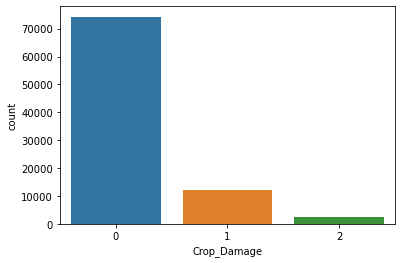

In [27]:
sns.countplot(x='Crop_Damage',data=train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A33A779A08>,
      dtype=object)

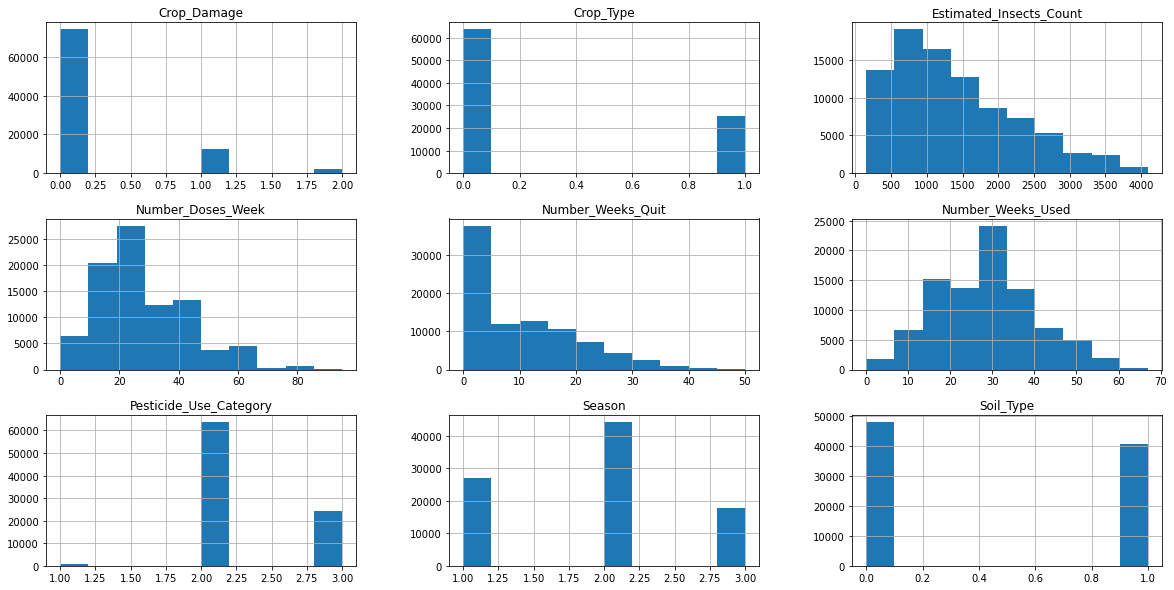

In [28]:
#Histogram for Data Distribution, skewness and outliers
train.hist(figsize=(20,10))

In [30]:
num_feat = ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']


In [31]:
#Let us check the skewness of the numercial values 
skew(train[num_feat])

array([0.83913147, 0.96286232, 0.24824378, 0.89275746])

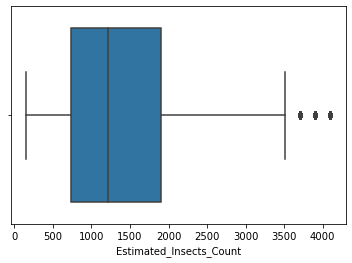

In [32]:
sns.boxplot(x=train['Estimated_Insects_Count'])

In [39]:
#Keeping a copy of the files
train_1 = train.copy

In [49]:
type(train)

pandas.core.frame.DataFrame

In [50]:
type(train_1)

method

In [40]:
test_1=test.copy()

In [52]:
cat_features = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']

In [48]:
train[cat_features] = train[cat_features].astype(str)


In [51]:
test[cat_features] = test[cat_features].astype(str)

In [53]:
train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                   object
Soil_Type                   object
Pesticide_Use_Category      object
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                      object
Crop_Damage                  int64
dtype: object

In [54]:
test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                   object
Soil_Type                   object
Pesticide_Use_Category      object
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                      object
dtype: object

Hence the data frame has correct dtypes now

In [55]:
#Dropping ID from both train and test dataset
train.drop('ID', axis=1, inplace=True)
test_id = test['ID']
test.drop('ID', axis=1, inplace=True)

In [56]:
train.shape

(88858, 9)

In [57]:
test.shape

(59310, 8)

In [59]:
type(test_id)

pandas.core.series.Series

In [60]:
test_id[0]

'F00000002'

In [61]:
#Creating dummy vars
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [62]:
train.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,188,0,0.0,0,0,0,1,1,0,1,0,0,1,0,0
1,209,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
2,257,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
3,257,0,0.0,0,1,0,1,0,1,1,0,0,0,1,0
4,342,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0


In [63]:
train.shape

(88858, 15)

In [64]:
X = train.drop('Crop_Damage', axis=1)
y = train['Crop_Damage']

In [65]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [68]:
score = accuracy_score(y_test, pred_lr)

In [69]:
score

0.8323955285467777

In [71]:
y_pred_lr = lr.predict(test)

In [72]:
y_pred_lr

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [73]:
import pickle


In [74]:
#Saving it in pickle
pickle_path = "D:\Agri_Ml\y_pred_lr.pkl"
pickle_mapping = open(pickle_path,"wb")
pickle.dump(y_pred_lr, pickle_mapping)
pickle_mapping.close()

In [75]:
test_id[0]

'F00000002'

In [76]:
submission = pd.DataFrame(columns=['ID','Crop_Damage'])
submission['ID'] = test_id
submission['Crop_Damage'] = y_pred_lr
submission.to_csv('submission_lr.csv', index=False)